## Import Libararies

In [1]:
!pip install scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np
# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [3]:
# # Function to read all sheets from an Excel file
# def read_all_sheets_from_excel(filepath):
#     xls = pd.ExcelFile(filepath)
#     df_dict = {}
#     for sheet_name in xls.sheet_names:
#         df_dict[sheet_name] = xls.parse(sheet_name)
#     return df_dict

In [4]:
# # List of file paths
# file_paths = ['AFG_Player_Data.xlsx', 'AUS_Player_Data.xlsx', 'BAN_Player_Data.xlsx', 'ENG_Player_Data.xlsx', 'IND_Player_Data.xlsx', 'NZL_Player_Data.xlsx', 'PAK_Player_Data.xlsx', 'SAF_Player_Data.xlsx', 'SRL_Player_Data.xlsx', 'WIN_Player_Data.xlsx']

In [5]:
# # Reading all files
# all_dataframes = {}
# for file_path in file_paths:
#     all_dataframes[file_path.split('_')[0]] = read_all_sheets_from_excel(file_path)

# print('Dataframe keys of dataframes:' + ', '.join(all_dataframes.keys()))

## Load Data

In [6]:
# Load the datasets
afg_df = pd.read_excel('AFG_Player_Data.xlsx')
aus_df = pd.read_excel('AUS_Player_Data.xlsx')
ban_df = pd.read_excel('BAN_Player_Data.xlsx')
eng_df = pd.read_excel('ENG_Player_Data.xlsx')
ind_df = pd.read_excel('IND_Player_Data.xlsx')
nzl_df = pd.read_excel('NZL_Player_Data.xlsx')
pak_df = pd.read_excel('PAK_Player_Data.xlsx')
saf_df = pd.read_excel('SAF_Player_Data.xlsx')
srl_df = pd.read_excel('SRL_Player_Data.xlsx')
win_df = pd.read_excel('WIN_Player_Data.xlsx')

## Data Pre-processing

In [7]:
afg_df.tail()

,Name,Known As,Born,Career,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best
24,Sharafuddin Ashraf*,Sharafuddin Ashraf,10/01/1995,2014-,20.0,12.0,70.0,0.0,21*,8.75,14.0,0.0,46.5,4.42,3/29
25,Usman Ghani*,Usman Ghani,20/11/1996,2014-,17.0,17.0,435.0,1.0,118*,25.59,1.0,0.0,34,5.37,1/21
26,Yamin Ahmadzai*,Yamin Ahmadzai,25/07/1992,2015-,9.0,5.0,9.0,0.0,5*,3.00,7.0,0.0,43.43,5.36,2/34
27,Zia-Ur-Rehman*,Zia-Ur-Rehman,30/12/1997,2023-,1.0,1.0,5.0,0.0,5*,5.00,0.0,0.0,-,6.29,0/22
28,Total Players = 28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
afg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      29 non-null     object 
 1   Known As  28 non-null     object 
 2   Born      28 non-null     object 
 3   Career    28 non-null     object 
 4   Matches   28 non-null     float64
 5   Inns      28 non-null     float64
 6   Runs      28 non-null     float64
 7   100s      28 non-null     float64
 8   HS        28 non-null     object 
 9   Bat Avg   28 non-null     float64
 10  Wkts      28 non-null     float64
 11  4W        28 non-null     float64
 12  Bowl Avg  28 non-null     object 
 13  E/R       28 non-null     object 
 14  Best      24 non-null     object 
dtypes: float64(7), object(8)
memory usage: 3.5+ KB


In [9]:
afg_df.isnull().sum()

Name        0
Known As    1
Born        1
Career      1
Matches     1
Inns        1
Runs        1
100s        1
HS          1
Bat Avg     1
Wkts        1
4W          1
Bowl Avg    1
E/R         1
Best        5
dtype: int64

In [10]:
# Removing Last column which has Number of Players
afg_df = afg_df.iloc[:-1]
aus_df = aus_df.iloc[:-1]
ban_df = ban_df.iloc[:-1]
eng_df = eng_df.iloc[:-1]
ind_df = ind_df.iloc[:-1]
nzl_df = nzl_df.iloc[:-1]
pak_df = pak_df.iloc[:-1]
saf_df = saf_df.iloc[:-1]
srl_df = srl_df.iloc[:-1]
win_df = win_df.iloc[:-1]

In [11]:
pak_df.tail()

,Name,Known As,Born,Career,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best
24,Shan Masood*,Shan Masood,14/10/1989,2019-,9.0,9.0,163.0,0.0,50*,18.11,0.0,0.0,-,-,NaN
25,Sohaib Maqsood*,Sohaib Maqsood,15/04/1987,2013-,29.0,28.0,781.0,0.0,89,30.04,1.0,0.0,42,4.67,1/16
26,Usama Mir*,Usama Mir,23/12/1995,2023-,12.0,6.0,40.0,0.0,20*,6.67,15.0,1.0,42.27,5.98,4/43
27,Zahid Mahmood*,Zahid Mahmood,20/03/1988,2022-,4.0,2.0,9.0,0.0,9*,9.00,4.0,0.0,55,6.11,2/59
28,Zaman Khan*,Zaman Khan,10/09/2001,2023-,1.0,0.0,0.0,0.0,0*,0.00,0.0,0.0,-,6.5,0/39


In [12]:
# df_names = [afg_df, aus_df, ban_df, eng_df, ind_df, nzl_df, pak_df, saf_df, srl_df, win_df]
country_code = ['AFG','AUS','BAN','ENG','IND','NZL','PAK','SAF','SRL','WIN']

In [13]:
# Function to Create Player ID Column
player_list = [] # Global variable
def create_player_id_col(df_no, no_of_players):
    player_no = 1
    while player_no != no_of_players:
        player_id = f'{country_code[df_no]}_{player_no}'
        player_no += 1
        
        global player_list
        player_list.append(player_id)
    player_no = 1
    # Swap
    temp_list = player_list
    player_list = []
    return temp_list
# print(create_player_id_col(0, (afg_df.shape[0] + 1)))

afg_df['Player ID'] = create_player_id_col(0, (afg_df.shape[0] + 1) ) # +1 as counting of rows start from 0
aus_df['Player ID'] = create_player_id_col(1, (aus_df.shape[0] + 1) )
ban_df['Player ID'] = create_player_id_col(2, (ban_df.shape[0] + 1) )
eng_df['Player ID'] = create_player_id_col(3, (eng_df.shape[0] + 1) )
ind_df['Player ID'] = create_player_id_col(4, (ind_df.shape[0] + 1) )
nzl_df['Player ID'] = create_player_id_col(5, (nzl_df.shape[0] + 1) )
pak_df['Player ID'] = create_player_id_col(6, (pak_df.shape[0] + 1) )
saf_df['Player ID'] = create_player_id_col(7, (saf_df.shape[0] + 1) )
srl_df['Player ID'] = create_player_id_col(8, (srl_df.shape[0] + 1) )
win_df['Player ID'] = create_player_id_col(9, (win_df.shape[0] + 1) )

In [14]:
ind_df.tail()

,Name,Known As,Born,Career,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
43,Umran Malik*,Umran Malik,22/11/1989,2022-,10.0,4.0,2.0,0.0,2,2.00,13.0,0.0,30.69,6.54,3/57,IND_44
44,J D Unadkat*,Jaydev Unadkat,18/10/1991,2013-,8.0,0.0,0.0,0.0,0*,0.00,9.0,1.0,25,3.95,4/41,IND_45
45,Washington Sundar*,Washington Sundar,05/10/1999,2017-,19.0,11.0,265.0,0.0,51*,26.50,18.0,0.0,28.94,4.92,3/30,IND_46
46,J Yadav*,Jayant Yadav,22/01/1990,2016-,2.0,2.0,3.0,0.0,2*,3.00,1.0,0.0,61,4.36,1/8,IND_47
47,S A Yadav*,Suryakumar Yadav,14/09/1990,2021-,37.0,35.0,773.0,0.0,72,25.77,0.0,0.0,-,8.5,0/17,IND_48


In [15]:
# Concat all dfs one over the other
player_df = pd.concat([afg_df, aus_df, ban_df, eng_df, ind_df, nzl_df, pak_df, saf_df, srl_df, win_df], ignore_index=True)

In [16]:
player_df.tail()

,Name,Known As,Born,Career,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
373,R Shepherd*,Romario Shepherd,26/11/1994,2019-,31.0,25.0,397.0,0.0,50*,18.05,27.0,0.0,40.11,5.55,3/37,WIN_39
374,K Sinclair*,Kevin Sinclair,23/11/1999,2022-,7.0,3.0,38.0,0.0,25*,19.00,11.0,2.0,25.64,4.44,4/24,WIN_40
375,O F Smith*,Odean Smith,01/11/1996,2022-,9.0,8.0,199.0,0.0,46*,28.43,9.0,0.0,29,5.53,2/29,WIN_41
376,O R Thomas*,Oshane Thomas,18/02/1997,2018-,25.0,14.0,22.0,0.0,7*,3.67,31.0,2.0,33.35,6.74,5/21,WIN_42
377,H R Walsh*,Hayden Walsh,23/04/1992,2019-,22.0,12.0,148.0,0.0,46,16.44,28.0,2.0,32.96,5.39,5/39,WIN_43


In [17]:
player_df.shape

(378, 16)

In [18]:
player_df = player_df.drop(['Born', 'Career'], axis=1)
player_df

,Name,Known As,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman*,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai*,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad*,Fareed Ahmad,17.0,7.0,42.0,0.0,17*,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi*,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar*,A M Ghazanfar,2.0,1.0,5.0,0.0,5*,5.00,0.0,0.0,-,5.22,0/13,AFG_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,R Shepherd*,Romario Shepherd,31.0,25.0,397.0,0.0,50*,18.05,27.0,0.0,40.11,5.55,3/37,WIN_39
374,K Sinclair*,Kevin Sinclair,7.0,3.0,38.0,0.0,25*,19.00,11.0,2.0,25.64,4.44,4/24,WIN_40
375,O F Smith*,Odean Smith,9.0,8.0,199.0,0.0,46*,28.43,9.0,0.0,29,5.53,2/29,WIN_41
376,O R Thomas*,Oshane Thomas,25.0,14.0,22.0,0.0,7*,3.67,31.0,2.0,33.35,6.74,5/21,WIN_42


In [19]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       378 non-null    object 
 1   Known As   378 non-null    object 
 2   Matches    378 non-null    float64
 3   Inns       378 non-null    float64
 4   Runs       378 non-null    float64
 5   100s       378 non-null    float64
 6   HS         378 non-null    object 
 7   Bat Avg    378 non-null    float64
 8   Wkts       378 non-null    float64
 9   4W         378 non-null    float64
 10  Bowl Avg   378 non-null    object 
 11  E/R        378 non-null    object 
 12  Best       294 non-null    object 
 13  Player ID  378 non-null    object 
dtypes: float64(7), object(7)
memory usage: 41.5+ KB


In [20]:
# # Removing '-' from dataset
# hyphen_index = player_df[player_df['Bowl Avg'].str.strip() == '-'].index.to_list()
# print(hyphen_index)
# new_vals = [0.0] * len(hyphen_index)
# # print(new_vals)
# for index, val in zip(hyphen_index, new_vals):
#     player_df.loc[index, 'Bowl Avg'] = val


# player_df['Bowl Avg'].str.replace('-', '0.0')

#player_df = player_df['Bowl Avg']

In [21]:
# Function to Remove '-' from columns
def remove_hyphens(*col_names): # Multiple Args
    for col in col_names:
        hyphen_index = player_df[player_df[col].str.strip() == '-'].index.to_list()
        new_vals = [0.0] * len(hyphen_index)
        
        for index, val in zip(hyphen_index, new_vals):
            player_df.loc[index, col] = val

In [22]:
remove_hyphens('Bowl Avg', 'E/R')

In [23]:
# # check hyphens
# for rec in player_df['Bowl Avg']:
#     if str(rec).strip() == '-':
#         print('Hyphen found')

In [24]:
player_df.head(26)

,Name,Known As,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman*,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai*,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad*,Fareed Ahmad,17.0,7.0,42.0,0.0,17*,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi*,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar*,A M Ghazanfar,2.0,1.0,5.0,0.0,5*,5.00,0.0,0.0,0.0,5.22,0/13,AFG_5
5,Gulbadin Naib*,Gulbadin Naib,82.0,71.0,1231.0,0.0,82,19.85,73.0,4.0,35.6,5.55,6/43,AFG_6
6,Hashmatullah Shahidi*,Hashmatullah Shahidi,78.0,78.0,2225.0,0.0,97,34.23,0.0,0.0,0.0,8.33,0/8,AFG_7
7,Ibrahim Zadran*,Ibrahim Zadran,33.0,33.0,1440.0,5.0,162*,48.00,0.0,0.0,0.0,0.0,NaN,AFG_8
8,Ikram Ali Khil*,Ikram Ali Khil,26.0,20.0,375.0,0.0,86*,25.00,0.0,0.0,0.0,0.0,NaN,AFG_9
9,Karim Janat*,Karim Janat,3.0,3.0,32.0,0.0,22*,10.67,0.0,0.0,0.0,6.92,0/20,AFG_10


In [25]:
player_df['Name'] = player_df['Name'].str.replace('*', '', regex=True)

In [26]:
player_df.head()

,Name,Known As,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad,Fareed Ahmad,17.0,7.0,42.0,0.0,17*,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar,A M Ghazanfar,2.0,1.0,5.0,0.0,5*,5.00,0.0,0.0,0.0,5.22,0/13,AFG_5


In [27]:
# Remove '*' at the end of some values in High Score Col
asterisk_presence = player_df['HS'].str.endswith('*')
# print(asterisk_presence)
asterisk_presence = asterisk_presence.fillna(False)
# print(asterisk_presence)
player_df.loc[asterisk_presence, 'HS'] = player_df.loc[asterisk_presence, 'HS'].str.rstrip('*')  

In [28]:
player_df.head(26)

,Name,Known As,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad,Fareed Ahmad,17.0,7.0,42.0,0.0,17,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar,A M Ghazanfar,2.0,1.0,5.0,0.0,5,5.00,0.0,0.0,0.0,5.22,0/13,AFG_5
5,Gulbadin Naib,Gulbadin Naib,82.0,71.0,1231.0,0.0,82,19.85,73.0,4.0,35.6,5.55,6/43,AFG_6
6,Hashmatullah Shahidi,Hashmatullah Shahidi,78.0,78.0,2225.0,0.0,97,34.23,0.0,0.0,0.0,8.33,0/8,AFG_7
7,Ibrahim Zadran,Ibrahim Zadran,33.0,33.0,1440.0,5.0,162,48.00,0.0,0.0,0.0,0.0,NaN,AFG_8
8,Ikram Ali Khil,Ikram Ali Khil,26.0,20.0,375.0,0.0,86,25.00,0.0,0.0,0.0,0.0,NaN,AFG_9
9,Karim Janat,Karim Janat,3.0,3.0,32.0,0.0,22,10.67,0.0,0.0,0.0,6.92,0/20,AFG_10


In [29]:
player_df['Best'] = player_df['Best'].fillna(0)

In [30]:
player_df.head(10)

,Name,Known As,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad,Fareed Ahmad,17.0,7.0,42.0,0.0,17,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar,A M Ghazanfar,2.0,1.0,5.0,0.0,5,5.00,0.0,0.0,0.0,5.22,0/13,AFG_5
5,Gulbadin Naib,Gulbadin Naib,82.0,71.0,1231.0,0.0,82,19.85,73.0,4.0,35.6,5.55,6/43,AFG_6
6,Hashmatullah Shahidi,Hashmatullah Shahidi,78.0,78.0,2225.0,0.0,97,34.23,0.0,0.0,0.0,8.33,0/8,AFG_7
7,Ibrahim Zadran,Ibrahim Zadran,33.0,33.0,1440.0,5.0,162,48.00,0.0,0.0,0.0,0.0,0,AFG_8
8,Ikram Ali Khil,Ikram Ali Khil,26.0,20.0,375.0,0.0,86,25.00,0.0,0.0,0.0,0.0,0,AFG_9
9,Karim Janat,Karim Janat,3.0,3.0,32.0,0.0,22,10.67,0.0,0.0,0.0,6.92,0/20,AFG_10


In [31]:
player_df['Name'] = player_df['Known As']
player_df = player_df.drop('Known As', axis=1)

In [32]:
player_df.head(26)

,Name,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Best,Player ID
0,Abdul Rahman,3.0,3.0,10.0,0.0,4,5.00,1.0,0.0,133,7.67,1/83,AFG_1
1,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149,47.93,18.0,0.0,45.78,5.7,3/56,AFG_2
2,Fareed Ahmad,17.0,7.0,42.0,0.0,17,14.00,23.0,0.0,28.22,5.64,3/56,AFG_3
3,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6,4.20,44.0,4.0,30.05,5.58,4/34,AFG_4
4,A M Ghazanfar,2.0,1.0,5.0,0.0,5,5.00,0.0,0.0,0.0,5.22,0/13,AFG_5
5,Gulbadin Naib,82.0,71.0,1231.0,0.0,82,19.85,73.0,4.0,35.6,5.55,6/43,AFG_6
6,Hashmatullah Shahidi,78.0,78.0,2225.0,0.0,97,34.23,0.0,0.0,0.0,8.33,0/8,AFG_7
7,Ibrahim Zadran,33.0,33.0,1440.0,5.0,162,48.00,0.0,0.0,0.0,0.0,0,AFG_8
8,Ikram Ali Khil,26.0,20.0,375.0,0.0,86,25.00,0.0,0.0,0.0,0.0,0,AFG_9
9,Karim Janat,3.0,3.0,32.0,0.0,22,10.67,0.0,0.0,0.0,6.92,0/20,AFG_10


In [33]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       378 non-null    object 
 1   Matches    378 non-null    float64
 2   Inns       378 non-null    float64
 3   Runs       378 non-null    float64
 4   100s       378 non-null    float64
 5   HS         378 non-null    object 
 6   Bat Avg    378 non-null    float64
 7   Wkts       378 non-null    float64
 8   4W         378 non-null    float64
 9   Bowl Avg   378 non-null    object 
 10  E/R        378 non-null    object 
 11  Best       378 non-null    object 
 12  Player ID  378 non-null    object 
dtypes: float64(7), object(6)
memory usage: 38.5+ KB


In [34]:
# Changing Datatypes of Cols
# player_df['Matches'] = player_df['Matches'].astype(int)
# player_df['Inns'] = player_df['Inns'].astype(int)
# player_df['100s'] = player_df['100s'].astype(int)
player_df['HS'] = player_df['HS'].astype(float)
# player_df['4W'] = player_df['4W'].astype(int)
player_df['Bowl Avg'] = player_df['Bowl Avg'].astype(float)
player_df['E/R'] = player_df['E/R'].astype(float)

In [35]:
player_df.dtypes

Name          object
Matches      float64
Inns         float64
Runs         float64
100s         float64
HS           float64
Bat Avg      float64
Wkts         float64
4W           float64
Bowl Avg     float64
E/R          float64
Best          object
Player ID     object
dtype: object

In [36]:
# # Converting fraction in Best Col to float
# def frac_to_float(frac_str, precision=2):
#     # removing extra spaces
#     frac_str = frac_str.strip()
    
#     if '/' in frac_str:
#         numerator, denominator = frac_str.split('/')
#         return round((float(numerator) / float(denominator)), precision)
#     else:
#         return round(float(frac_str), precision)

In [37]:
# Deleting Best Bowling Figures due to its Insignificance in our Recommender
player_df = player_df.drop('Best', axis=1)
player_df.head(2)

,Name,Matches,Inns,Runs,100s,HS,Bat Avg,Wkts,4W,Bowl Avg,E/R,Player ID
0,Abdul Rahman,3.0,3.0,10.0,0.0,4.0,5.00,1.0,0.0,133.00,7.67,AFG_1
1,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149.0,47.93,18.0,0.0,45.78,5.70,AFG_2


In [38]:
new_col_names = {'Inns': 'Innings',
                '100s': 'Centuries',
                'HS': 'High_Score',
                'Bat Avg': 'Bat_Avg',
                '4W': 'Four_Wkts',
                'Bowl Avg': 'Bowl_Avg',
                'E/R': 'Economy_Rate',
                'Player ID': 'Player_ID'}
player_df = player_df.rename(columns=new_col_names)
player_df.head(2)

,Name,Matches,Innings,Runs,Centuries,High_Score,Bat_Avg,Wkts,Four_Wkts,Bowl_Avg,Economy_Rate,Player_ID
0,Abdul Rahman,3.0,3.0,10.0,0.0,4.0,5.00,1.0,0.0,133.00,7.67,AFG_1
1,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149.0,47.93,18.0,0.0,45.78,5.70,AFG_2


### Calculating Number of Not Out Innings
![Bat_Avg_Formula](Bat_Avg_Formula.png)\
[Explaination Video Link](https://www.youtube.com/watch?v=9b3ZlmaoMEc)

In [39]:
def calc_NO(inngs=0.0, runs=0.0, bat_avg=0.0):
    if bat_avg != 0.0:
        runs_per_bat_avg = float(runs) / float(bat_avg)
        no = round( float(inngs) - float(runs_per_bat_avg) )
        return no
    else:
        return 0.0

In [40]:
player_df["Not_Outs"] = player_df.apply(lambda row: calc_NO(row['Innings'], row['Runs'], row['Bat_Avg']), axis=1)

In [41]:
player_df.head(10)

,Name,Matches,Innings,Runs,Centuries,High_Score,Bat_Avg,Wkts,Four_Wkts,Bowl_Avg,Economy_Rate,Player_ID,Not_Outs
0,Abdul Rahman,3.0,3.0,10.0,0.0,4.0,5.00,1.0,0.0,133.00,7.67,AFG_1,1.0
1,Azmatullah Omarzai,27.0,21.0,719.0,1.0,149.0,47.93,18.0,0.0,45.78,5.70,AFG_2,6.0
2,Fareed Ahmad,17.0,7.0,42.0,0.0,17.0,14.00,23.0,0.0,28.22,5.64,AFG_3,4.0
3,Fazalhaq Farooqi,32.0,17.0,21.0,0.0,6.0,4.20,44.0,4.0,30.05,5.58,AFG_4,12.0
4,A M Ghazanfar,2.0,1.0,5.0,0.0,5.0,5.00,0.0,0.0,0.00,5.22,AFG_5,0.0
5,Gulbadin Naib,82.0,71.0,1231.0,0.0,82.0,19.85,73.0,4.0,35.60,5.55,AFG_6,9.0
6,Hashmatullah Shahidi,78.0,78.0,2225.0,0.0,97.0,34.23,0.0,0.0,0.00,8.33,AFG_7,13.0
7,Ibrahim Zadran,33.0,33.0,1440.0,5.0,162.0,48.00,0.0,0.0,0.00,0.00,AFG_8,3.0
8,Ikram Ali Khil,26.0,20.0,375.0,0.0,86.0,25.00,0.0,0.0,0.00,0.00,AFG_9,5.0
9,Karim Janat,3.0,3.0,32.0,0.0,22.0,10.67,0.0,0.0,0.00,6.92,AFG_10,0.0


In [42]:
# Saving this version
player_backup = player_df.copy()

In [43]:
player_backup.tail(3)

,Name,Matches,Innings,Runs,Centuries,High_Score,Bat_Avg,Wkts,Four_Wkts,Bowl_Avg,Economy_Rate,Player_ID,Not_Outs
375,Odean Smith,9.0,8.0,199.0,0.0,46.0,28.43,9.0,0.0,29.00,5.53,WIN_41,1.0
376,Oshane Thomas,25.0,14.0,22.0,0.0,7.0,3.67,31.0,2.0,33.35,6.74,WIN_42,8.0
377,Hayden Walsh,22.0,12.0,148.0,0.0,46.0,16.44,28.0,2.0,32.96,5.39,WIN_43,3.0


In [44]:
# for adding our derived parameters, we remove all primitive parameters
player_df = player_df.drop(['Matches', 'Innings', 'Runs', 'Centuries', 
                            'High_Score', 'Wkts', 'Four_Wkts', 'Bat_Avg', 'Bowl_Avg', 'Economy_Rate', 'Not_Outs'], axis=1)

In [45]:
player_df.tail(3)

,Name,Player_ID
375,Odean Smith,WIN_41
376,Oshane Thomas,WIN_42
377,Hayden Walsh,WIN_43


In [46]:
# # Reordering Cols
# new_col_order = ['Player_ID', 'Name', 'Bat_Avg', 'Bowl_Avg', 'Economy_Rate']
# player_df = player_df[new_col_order]

In [47]:
# player_df.tail(3)

# Feature Engineering

In [48]:
# To Calculate the Derived Parameters
def calc_parameters(num=0, deno=1, multiplier=1):
    if deno == 0.0 or num == 0.0:
        return 0.0
    else:
        return ((num / deno) * multiplier)

## Batting Parameters
- Per Innings Parameters indicate the Batting ABILITY of the Player
- Per Match Parameters indicate the Batting CONSISTENCY of the Player

### Runs Scored per Inning
- Higher values indicate a batsman who tends to score a higher number of runs per inning faced.

In [49]:
# Applying function on two cols, row wise...
player_df['Bat_Run_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Runs'], row['Innings']), axis=1)

In [50]:
player_df.head(10)

,Name,Player_ID,Bat_Run_Per_Inngs
0,Abdul Rahman,AFG_1,3.333333
1,Azmatullah Omarzai,AFG_2,34.238095
2,Fareed Ahmad,AFG_3,6.000000
3,Fazalhaq Farooqi,AFG_4,1.235294
4,A M Ghazanfar,AFG_5,5.000000
5,Gulbadin Naib,AFG_6,17.338028
6,Hashmatullah Shahidi,AFG_7,28.525641
7,Ibrahim Zadran,AFG_8,43.636364
8,Ikram Ali Khil,AFG_9,18.750000
9,Karim Janat,AFG_10,10.666667


### Runs Scored per Match
- Higher values suggest a batsman who consistently contributes to the team's total score in each match.

In [51]:
player_df['Bat_Run_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Runs'], row['Matches']), axis=1)

In [52]:
player_df.tail(10)

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match
368,Rovman Powell,WIN_34,20.395833,19.196078
369,Raymon Reifer,WIN_35,10.200000,8.500000
370,Kemar Roach,WIN_36,5.133333,3.242105
371,Sherfane Rutherford,WIN_37,24.000000,24.000000
372,Jayden Seales,WIN_38,3.400000,1.700000
373,Romario Shepherd,WIN_39,15.880000,12.806452
374,Kevin Sinclair,WIN_40,12.666667,5.428571
375,Odean Smith,WIN_41,24.875000,22.111111
376,Oshane Thomas,WIN_42,1.571429,0.880000
377,Hayden Walsh,WIN_43,12.333333,6.727273


### Centuries Scored per Match
- Higher values suggest a batsman who consistently performs exceptionally well by scoring centuries.

In [53]:
player_df['Bat_Cent_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Centuries'], row['Matches']), axis=1)

In [54]:
player_df.tail(10)

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match
368,Rovman Powell,WIN_34,20.395833,19.196078,0.019608
369,Raymon Reifer,WIN_35,10.200000,8.500000,0.000000
370,Kemar Roach,WIN_36,5.133333,3.242105,0.000000
371,Sherfane Rutherford,WIN_37,24.000000,24.000000,0.000000
372,Jayden Seales,WIN_38,3.400000,1.700000,0.000000
373,Romario Shepherd,WIN_39,15.880000,12.806452,0.000000
374,Kevin Sinclair,WIN_40,12.666667,5.428571,0.000000
375,Odean Smith,WIN_41,24.875000,22.111111,0.000000
376,Oshane Thomas,WIN_42,1.571429,0.880000,0.000000
377,Hayden Walsh,WIN_43,12.333333,6.727273,0.000000


### Centuries Scored per Inning
- Higher values indicate a batsman who tends to score centuries more frequently per inning.

In [55]:
player_df['Bat_Cent_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Centuries'], row['Innings']), axis=1)

In [56]:
player_df.tail(10)

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs
368,Rovman Powell,WIN_34,20.395833,19.196078,0.019608,0.020833
369,Raymon Reifer,WIN_35,10.200000,8.500000,0.000000,0.000000
370,Kemar Roach,WIN_36,5.133333,3.242105,0.000000,0.000000
371,Sherfane Rutherford,WIN_37,24.000000,24.000000,0.000000,0.000000
372,Jayden Seales,WIN_38,3.400000,1.700000,0.000000,0.000000
373,Romario Shepherd,WIN_39,15.880000,12.806452,0.000000,0.000000
374,Kevin Sinclair,WIN_40,12.666667,5.428571,0.000000,0.000000
375,Odean Smith,WIN_41,24.875000,22.111111,0.000000,0.000000
376,Oshane Thomas,WIN_42,1.571429,0.880000,0.000000,0.000000
377,Hayden Walsh,WIN_43,12.333333,6.727273,0.000000,0.000000


In [57]:
# player_df['Bat_Cent_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Centuries'], row['Innings']), axis=1)

### Batting High Score per Match
- Higher values suggest a batsman who consistently achieves high scores in matches.

In [58]:
player_df['Bat_HS_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['High_Score'], row['Matches']), axis=1)

In [59]:
player_df.iloc[80:90]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match
80,Mosaddeck Hossain,BAN_13,18.114286,14.744186,0.000000,0.000000,1.209302
81,Mrittunjoy Chowdhury,BAN_14,8.000000,8.000000,0.000000,0.000000,8.000000
82,Mushfiqur Rahim,BAN_15,30.798419,28.752768,0.033210,0.035573,0.531365
83,Mustafizur Rahman,BAN_16,3.137255,1.538462,0.000000,0.000000,0.192308
84,Najmul Hossain Shanto,BAN_17,31.022727,30.333333,0.066667,0.068182,2.711111
85,Nasum Ahmed,BAN_18,17.333333,10.400000,0.000000,0.000000,2.933333
86,Nurul Hasan,BAN_19,33.000000,23.571429,0.000000,0.000000,6.428571
87,Rishad Hossain,BAN_20,27.000000,18.000000,0.000000,0.000000,16.000000
88,Rony Talukdar,BAN_21,4.000000,4.000000,0.000000,0.000000,4.000000
89,Shakib Al Hasan,BAN_22,32.350427,30.647773,0.036437,0.038462,0.542510


### Batting High Score per Inning
- Higher values indicate a batsman who tends to achieve high scores more frequently per inning.

In [60]:
player_df['Bat_HS_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['High_Score'], row['Innings']), axis=1)

In [61]:
player_df.iloc[70:80]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs
70,Ebadot Hossain,BAN_3,0.500000,0.250000,0.000000,0.000000,0.083333,0.166667
71,Hasan Mahmud,BAN_4,3.500000,2.227273,0.000000,0.000000,0.681818,1.071429
72,Khaled Ahmed,BAN_5,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000
73,Litton Das,BAN_6,28.477778,28.164835,0.054945,0.055556,1.934066,1.955556
74,Mahedi Hasan,BAN_7,12.200000,11.090909,0.000000,0.000000,2.636364,2.900000
75,Mahmudullah,BAN_8,26.663366,23.215517,0.017241,0.019802,0.551724,0.633663
76,Mehidy Hasan Miraz,BAN_9,19.573529,13.721649,0.020619,0.029412,1.154639,1.647059
77,Mohammad Mithun,BAN_10,23.800000,21.000000,0.000000,0.000000,2.147059,2.433333
78,Mohammad Naim,BAN_11,13.571429,11.875000,0.000000,0.000000,3.500000,4.000000
79,Mohammad Saifuddin,BAN_12,19.052632,12.482759,0.000000,0.000000,1.758621,2.684211


### Batting Number of Not Outs
- Higher values indicates batsman's ability to stay at the crease and contribute to the team's score without getting out.

In [62]:
player_df["Bat_Not_Outs"] = player_backup["Not_Outs"]

In [63]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0


## Bowling Parameters
- Per Innings Parameters indicate the Bowling ABILITY of the Player
- Per Match Parameters indicate the Bowling CONSISTENCY of the Player

### Wickets Taken per Match
- Higher values suggest a bowler who consistently contributes to the team's wicket-taking ability in each match.

In [64]:
player_df['Bowl_Wkts_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Wkts'], row['Matches']), axis=1)

In [65]:
player_df.iloc[90:100]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match
90,Shamim Hossain,BAN_23,8.250000,8.250000,0.000000,0.000000,4.000000,4.000000,0.0,0.000000
91,Shoriful Islam,BAN_24,4.150000,2.305556,0.000000,0.000000,0.444444,0.800000,9.0,1.555556
92,Soumya Sarkar,BAN_25,31.437500,29.159420,0.043478,0.046875,2.449275,2.640625,4.0,0.217391
93,Taijul Islam,BAN_26,9.166667,5.500000,0.000000,0.000000,1.950000,3.250000,2.0,1.550000
94,Tamim Iqbal,BAN_27,34.820833,34.390947,0.057613,0.058333,0.650206,0.658333,12.0,0.000000
95,Tanzid Hasan,BAN_28,18.785714,17.533333,0.000000,0.000000,5.600000,6.000000,0.0,0.000000
96,Tanzim Hasan Sakib,BAN_29,12.500000,7.142857,0.000000,0.000000,2.571429,4.500000,2.0,1.714286
97,Taskin Ahmed,BAN_30,5.564103,2.972603,0.000000,0.000000,0.287671,0.538462,12.0,1.410959
98,Towhid Hridoy,BAN_31,32.615385,28.266667,0.000000,0.000000,3.200000,3.692308,3.0,0.000000
99,Yasir Ali,BAN_32,14.571429,11.333333,0.000000,0.000000,5.555556,7.142857,0.0,0.000000


### Wickets Taken per Inning
- Higher values indicate a bowler who tends to take a higher number of wickets per inning bowled.

In [66]:
player_df['Bowl_Wkts_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Wkts'], row['Innings']), axis=1)

In [67]:
player_df.iloc[60:65]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs
60,Mitchell Starc,AUS_33,8.042254,4.719008,0.000000,0.000000,0.429752,0.732394,25.0,1.950413,3.323944
61,Marcus Stoinis,AUS_34,23.603175,21.242857,0.014286,0.015873,2.085714,2.317460,8.0,0.685714,0.761905
62,Will Sutherland,AUS_35,18.000000,9.000000,0.000000,0.000000,9.000000,18.000000,0.0,1.000000,2.000000
63,Mitchell Swepson,AUS_36,2.000000,0.666667,0.000000,0.000000,0.666667,2.000000,0.0,1.000000,3.000000
64,Ashton Turner,AUS_37,27.428571,21.333333,0.000000,0.000000,9.333333,12.000000,1.0,0.222222,0.285714


### Four Wickets Taken per Match
- Higher values suggest a bowler who consistently performs exceptionally well by taking four-wicket hauls.

In [68]:
player_df['Bowl_Four_Wkts_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Four_Wkts'], row['Matches']), axis=1)

In [69]:
player_df.iloc[70:75]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match
70,Ebadot Hossain,BAN_3,0.500000,0.250000,0.000000,0.000000,0.083333,0.166667,4.0,1.833333,3.666667,0.166667
71,Hasan Mahmud,BAN_4,3.500000,2.227273,0.000000,0.000000,0.681818,1.071429,4.0,1.363636,2.142857,0.045455
72,Khaled Ahmed,BAN_5,0.500000,0.500000,0.000000,0.000000,0.500000,0.500000,1.0,1.500000,1.500000,0.000000
73,Litton Das,BAN_6,28.477778,28.164835,0.054945,0.055556,1.934066,1.955556,8.0,0.000000,0.000000,0.000000
74,Mahedi Hasan,BAN_7,12.200000,11.090909,0.000000,0.000000,2.636364,2.900000,2.0,1.272727,1.400000,0.090909


### Four Wickets Taken per Inning
- Higher values indicate a bowler who tends to achieve four-wicket hauls more frequently per inning.

In [70]:
player_df['Bowl_Four_Wkts_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Four_Wkts'], row['Innings']), axis=1)

In [71]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0,0.000000,0.000000,0.000000,0.00
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0,0.000000,0.000000,0.000000,0.00
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0,1.707071,3.520833,0.121212,0.25
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0,0.096774,0.111111,0.000000,0.00
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0,0.000000,0.000000,0.000000,0.00


### Bowling Average per Match
- Lower values suggest a bowler who consistently concedes fewer runs per wicket taken in each match.

In [72]:
player_df['Bowl_Avg_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Bowl_Avg'], row['Matches']), axis=1)

In [73]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs,Bowl_Avg_Per_Match
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0,0.000000,0.000000,0.000000,0.00,0.000000
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0,0.000000,0.000000,0.000000,0.00,0.000000
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0,1.707071,3.520833,0.121212,0.25,0.283434
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0,0.096774,0.111111,0.000000,0.00,0.978387
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0,0.000000,0.000000,0.000000,0.00,0.000000


### Bowling Average per Innings
- Lower values indicate a bowler who tends to concede fewer runs per wicket taken per inning.

In [74]:
player_df['Bowl_Avg_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Bowl_Avg'], row['Innings']), axis=1)

In [75]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs,Bowl_Avg_Per_Match,Bowl_Avg_Per_Inngs
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0,1.707071,3.520833,0.121212,0.25,0.283434,0.584583
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0,0.096774,0.111111,0.000000,0.00,0.978387,1.123333
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


### Bowling Economy Rate per Innings
- Lower values indicate a bowler who tends to maintain a low run rate per over per inning.

In [76]:
player_df['Bowl_Eco_Rate_Per_Inngs'] = player_backup.apply(lambda row: calc_parameters(row['Economy_Rate'], row['Innings']), axis=1)

In [77]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs,Bowl_Avg_Per_Match,Bowl_Avg_Per_Inngs,Bowl_Eco_Rate_Per_Inngs
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.050314
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0,1.707071,3.520833,0.121212,0.25,0.283434,0.584583,0.113958
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0,0.096774,0.111111,0.000000,0.00,0.978387,1.123333,0.215185
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


### Bowling Economy Rate per Match
- Lower values suggest a bowler who consistently maintains a low run rate per over in each match.

In [78]:
player_df['Bowl_Eco_Rate_Per_Match'] = player_backup.apply(lambda row: calc_parameters(row['Economy_Rate'], row['Matches']), axis=1)

In [79]:
player_df.iloc[65:70]

,Name,Player_ID,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs,Bowl_Avg_Per_Match,Bowl_Avg_Per_Inngs,Bowl_Eco_Rate_Per_Inngs,Bowl_Eco_Rate_Per_Match
65,Matthew Wade,AUS_38,22.493976,19.247423,0.010309,0.012048,1.030928,1.204819,12.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
66,David Warner,AUS_39,43.597484,43.055901,0.136646,0.138365,1.111801,1.125786,6.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.050314,0.049689
67,Adam Zampa,AUS_40,6.104167,2.959596,0.000000,0.000000,0.363636,0.750000,18.0,1.707071,3.520833,0.121212,0.25,0.283434,0.584583,0.113958,0.055253
68,Afif Hossain,BAN_1,22.222222,19.354839,0.000000,0.000000,3.000000,3.444444,6.0,0.096774,0.111111,0.000000,0.00,0.978387,1.123333,0.215185,0.187419
69,Anamul Haque,BAN_2,29.391304,27.591837,0.061224,0.065217,2.448980,2.608696,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


# Model Building

In [80]:
player_df.columns.tolist()

['Name',
 'Player_ID',
 'Bat_Run_Per_Inngs',
 'Bat_Run_Per_Match',
 'Bat_Cent_Per_Match',
 'Bat_Cent_Per_Inngs',
 'Bat_HS_Per_Match',
 'Bat_HS_Per_Inngs',
 'Bat_Not_Outs',
 'Bowl_Wkts_Per_Match',
 'Bowl_Wkts_Per_Inngs',
 'Bowl_Four_Wkts_Per_Match',
 'Bowl_Four_Wkts_Per_Inngs',
 'Bowl_Avg_Per_Match',
 'Bowl_Avg_Per_Inngs',
 'Bowl_Eco_Rate_Per_Inngs',
 'Bowl_Eco_Rate_Per_Match']

In [81]:
bat_features = ['Bat_Run_Per_Inngs',
 'Bat_Run_Per_Match',
 'Bat_Cent_Per_Match',
 'Bat_Cent_Per_Inngs',
 'Bat_HS_Per_Match',
 'Bat_HS_Per_Inngs',
 'Bat_Not_Outs']

In [82]:
bowl_features = ['Bowl_Wkts_Per_Match',
 'Bowl_Wkts_Per_Inngs',
 'Bowl_Four_Wkts_Per_Match',
 'Bowl_Four_Wkts_Per_Inngs',
 'Bowl_Avg_Per_Match',
 'Bowl_Avg_Per_Inngs',
 'Bowl_Eco_Rate_Per_Inngs',
 'Bowl_Eco_Rate_Per_Match']

In [83]:
player_details = player_df[['Player_ID', 'Name']].copy()
player_bat_df = pd.concat([player_details, player_df[bat_features]], axis=1)
player_bowl_df = pd.concat([player_details, player_df[bowl_features]], axis=1)

In [84]:
player_bat_df.head(5)

,Player_ID,Name,Bat_Run_Per_Inngs,Bat_Run_Per_Match,Bat_Cent_Per_Match,Bat_Cent_Per_Inngs,Bat_HS_Per_Match,Bat_HS_Per_Inngs,Bat_Not_Outs
0,AFG_1,Abdul Rahman,3.333333,3.333333,0.000000,0.000000,1.333333,1.333333,1.0
1,AFG_2,Azmatullah Omarzai,34.238095,26.629630,0.037037,0.047619,5.518519,7.095238,6.0
2,AFG_3,Fareed Ahmad,6.000000,2.470588,0.000000,0.000000,1.000000,2.428571,4.0
3,AFG_4,Fazalhaq Farooqi,1.235294,0.656250,0.000000,0.000000,0.187500,0.352941,12.0
4,AFG_5,A M Ghazanfar,5.000000,2.500000,0.000000,0.000000,2.500000,5.000000,0.0


In [85]:
player_bowl_df.head(5)

,Player_ID,Name,Bowl_Wkts_Per_Match,Bowl_Wkts_Per_Inngs,Bowl_Four_Wkts_Per_Match,Bowl_Four_Wkts_Per_Inngs,Bowl_Avg_Per_Match,Bowl_Avg_Per_Inngs,Bowl_Eco_Rate_Per_Inngs,Bowl_Eco_Rate_Per_Match
0,AFG_1,Abdul Rahman,0.333333,0.333333,0.000,0.000000,44.333333,44.333333,2.556667,2.556667
1,AFG_2,Azmatullah Omarzai,0.666667,0.857143,0.000,0.000000,1.695556,2.180000,0.271429,0.211111
2,AFG_3,Fareed Ahmad,1.352941,3.285714,0.000,0.000000,1.660000,4.031429,0.805714,0.331765
3,AFG_4,Fazalhaq Farooqi,1.375000,2.588235,0.125,0.235294,0.939063,1.767647,0.328235,0.174375
4,AFG_5,A M Ghazanfar,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,5.220000,2.610000


### Separating Team Data in a Dictionary

In [86]:
# Dictionary which will hold separated Team Data
country_bat_dfs = {}
country_bowl_dfs = {}

In [87]:
# Iterate through the DataFrame and create separate DataFrames for each team
current_team = None
for index, row in player_df.iterrows():
    team = row['Player_ID'].split('_')[0]
    if team != current_team:
        current_team = team
        country_bat_dfs[team] = pd.DataFrame(columns=player_bat_df.columns)
        country_bowl_dfs[team] = pd.DataFrame(columns=player_bowl_df.columns)
        
    country_bat_dfs[team] = pd.concat([country_bat_dfs[team], pd.DataFrame([row], columns=player_bat_df.columns)], ignore_index=True)
    country_bowl_dfs[team] = pd.concat([country_bowl_dfs[team], pd.DataFrame([row], columns=player_bowl_df.columns)], ignore_index=True)

In [88]:
# Batting Dict
for country, team_bat_df in country_bat_dfs.items():
    print(f"Team: {country}")
    print(team_bat_df)
    print("\n")

Team: AFG
   Player_ID                  Name  Bat_Run_Per_Inngs  Bat_Run_Per_Match  \
0      AFG_1          Abdul Rahman           3.333333           3.333333   
1      AFG_2    Azmatullah Omarzai          34.238095          26.629630   
2      AFG_3          Fareed Ahmad           6.000000           2.470588   
3      AFG_4      Fazalhaq Farooqi           1.235294           0.656250   
4      AFG_5         A M Ghazanfar           5.000000           2.500000   
5      AFG_6         Gulbadin Naib          17.338028          15.012195   
6      AFG_7  Hashmatullah Shahidi          28.525641          28.525641   
7      AFG_8        Ibrahim Zadran          43.636364          43.636364   
8      AFG_9        Ikram Ali Khil          18.750000          14.423077   
9     AFG_10           Karim Janat          10.666667          10.666667   
10    AFG_11         Mohammad Nabi          24.274648          21.409938   
11    AFG_12       Mohammad Saleem           0.000000           0.000000   
12

In [89]:
# Bowling Dict
for country, team_bowl_df in country_bowl_dfs.items():
    print(f"Team: {country}")
    print(team_bowl_df)
    print("\n")

Team: AFG
   Player_ID                  Name  Bowl_Wkts_Per_Match  Bowl_Wkts_Per_Inngs  \
0      AFG_1          Abdul Rahman             0.333333             0.333333   
1      AFG_2    Azmatullah Omarzai             0.666667             0.857143   
2      AFG_3          Fareed Ahmad             1.352941             3.285714   
3      AFG_4      Fazalhaq Farooqi             1.375000             2.588235   
4      AFG_5         A M Ghazanfar             0.000000             0.000000   
5      AFG_6         Gulbadin Naib             0.890244             1.028169   
6      AFG_7  Hashmatullah Shahidi             0.000000             0.000000   
7      AFG_8        Ibrahim Zadran             0.000000             0.000000   
8      AFG_9        Ikram Ali Khil             0.000000             0.000000   
9     AFG_10           Karim Janat             0.000000             0.000000   
10    AFG_11         Mohammad Nabi             1.049689             1.190141   
11    AFG_12       Mohammad Sa

## Like-for-Like Batting Replacement

In [90]:
def train_bat_knn_model(player_bat_df):
    X = player_bat_df[bat_features]
    y = player_bat_df['Player_ID']  # 'Player_ID' is the target variable for similarity
    knn_model = KNeighborsRegressor(n_neighbors=6, weights='distance')
    knn_model.fit(X, y)
    return knn_model

In [91]:
def recommend_bat_players(player_id_injured, player_bat_df, knn_model):
    # Retrieving batting statistics for the player to replace
    player_injured_data = player_bat_df[player_bat_df['Player_ID'] == player_id_injured]
    player_injured = player_injured_data['Name'].values[0]

    # Query kNN model to find nearest neighbors
    player_features_injured = player_injured_data[bat_features]
    nearest_neighbor_distances, nearest_neighbor_indices = knn_model.kneighbors(player_features_injured, return_distance=True)
    
    # Generate recommendations based on nearest neighbors
    recommendations = []
    for dist, idx in zip(nearest_neighbor_distances.flatten(), nearest_neighbor_indices.flatten()):
        similar_player_id = player_bat_df.iloc[idx]['Player_ID']
        similar_player_name = player_bat_df.iloc[idx]['Name']
        recommendations.append((similar_player_name, similar_player_id, dist))

    return recommendations, player_injured

In [92]:
# Sample Batting Recommendation
# player_id_injured = 'IND_16'  # Virat Kohli
# player_id_injured = 'AUS_40'  # Adam Zampa
player_id_injured = 'IND_38'  # Rohit Sharma

Model Traned for Country Code: IND


Top Like-for-Like Batting Replacements for Rohit Sharma:

Injured Player Data:



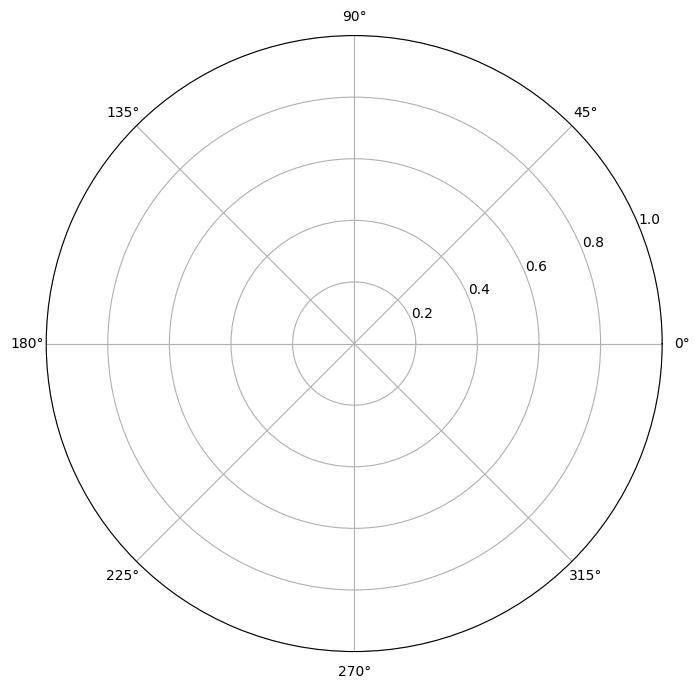

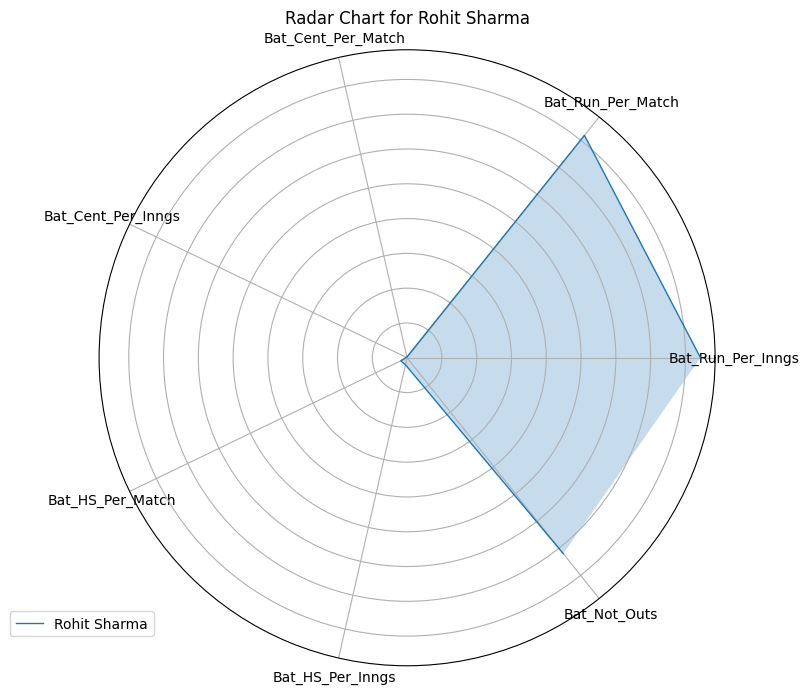



Name: Virat Kohli, Player ID: IND_16, Distance: 12.666414703465831



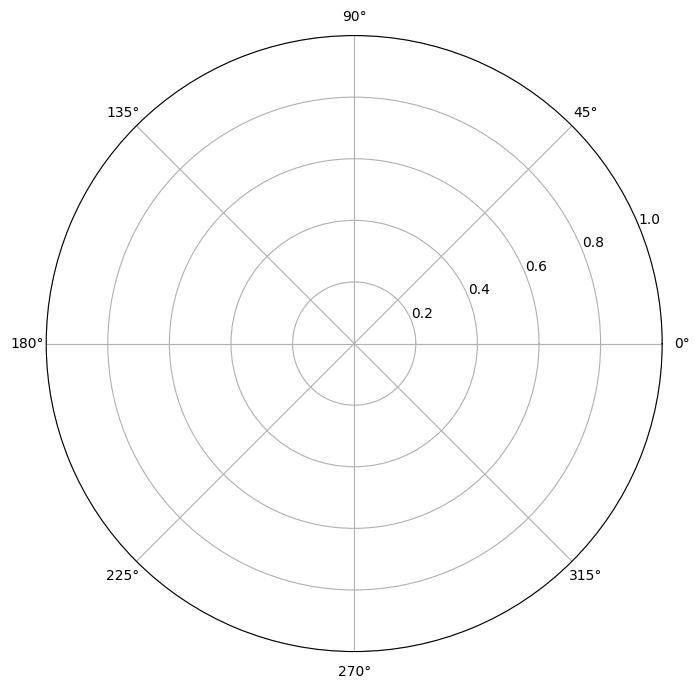

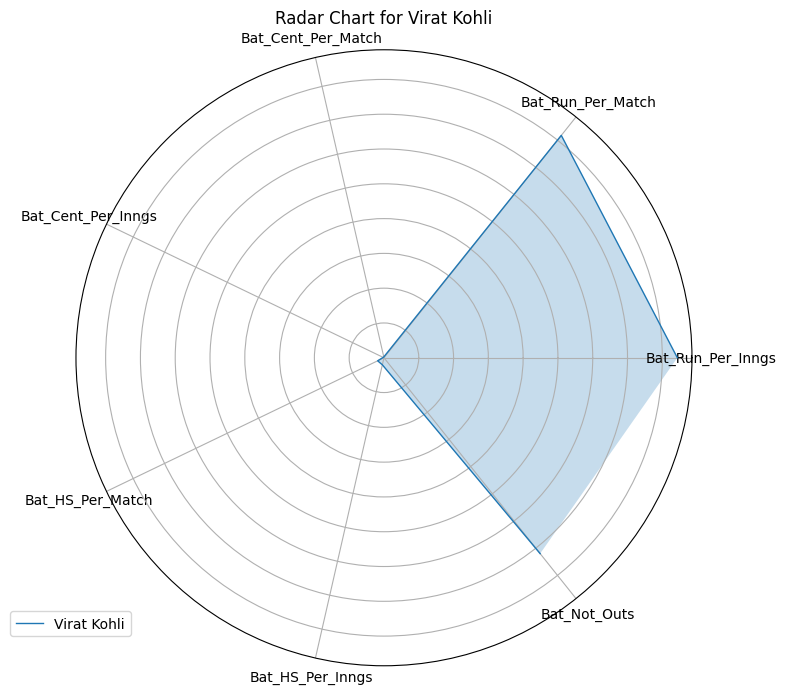



Name: KL Rahul, Player ID: IND_29, Distance: 22.33358364415338



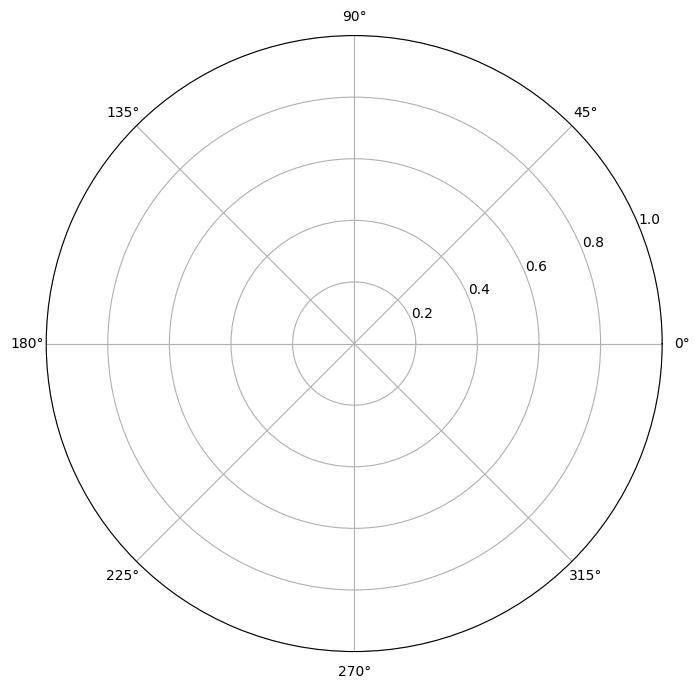

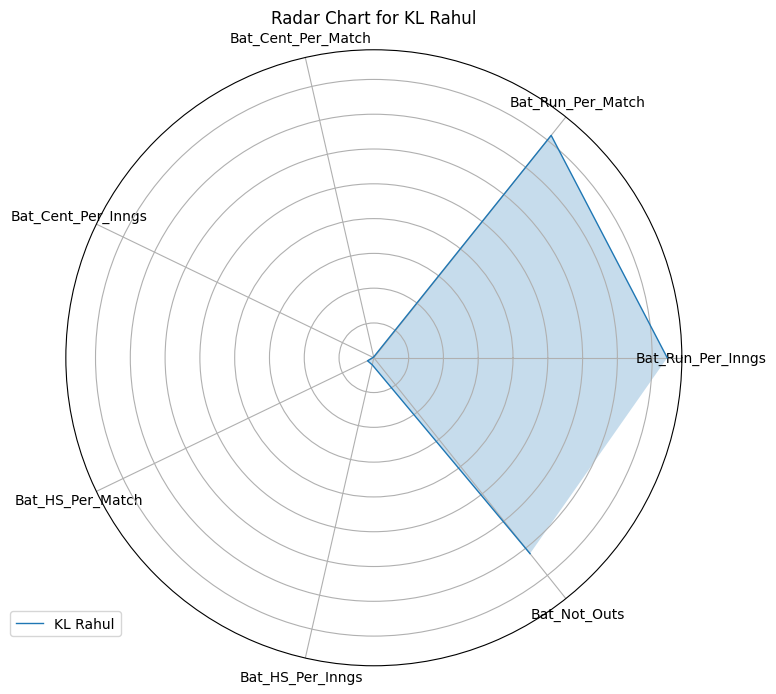



Name: Shikhar Dhawan, Player ID: IND_8, Distance: 26.012288009957004



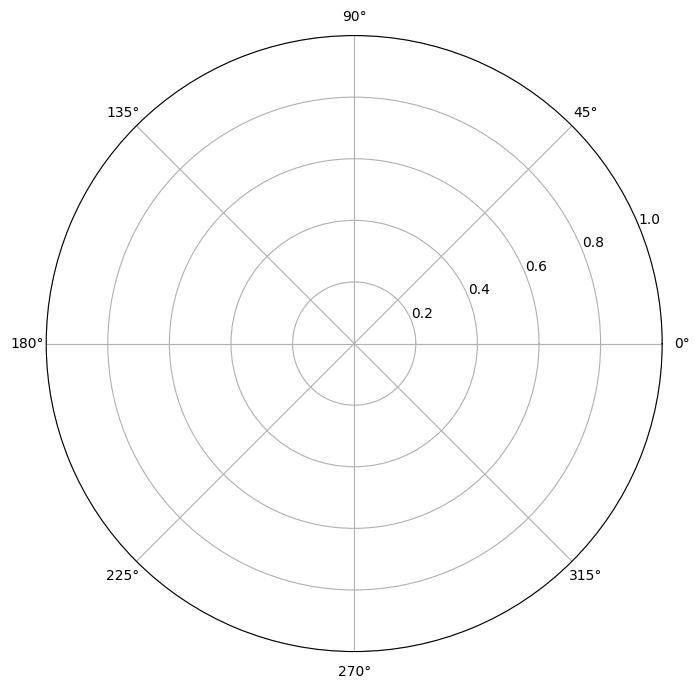

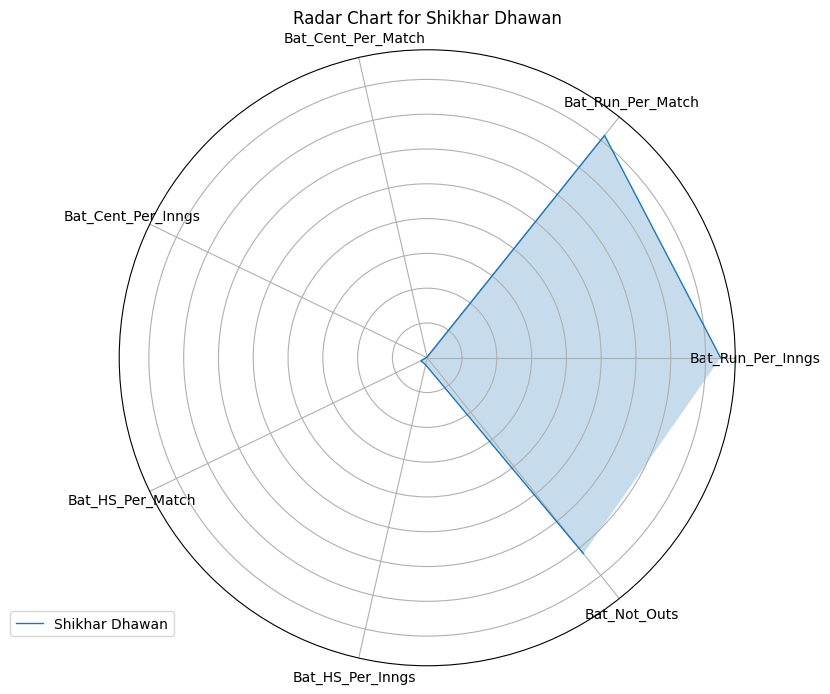



Name: Shreyas Iyer, Player ID: IND_13, Distance: 30.12028875401309



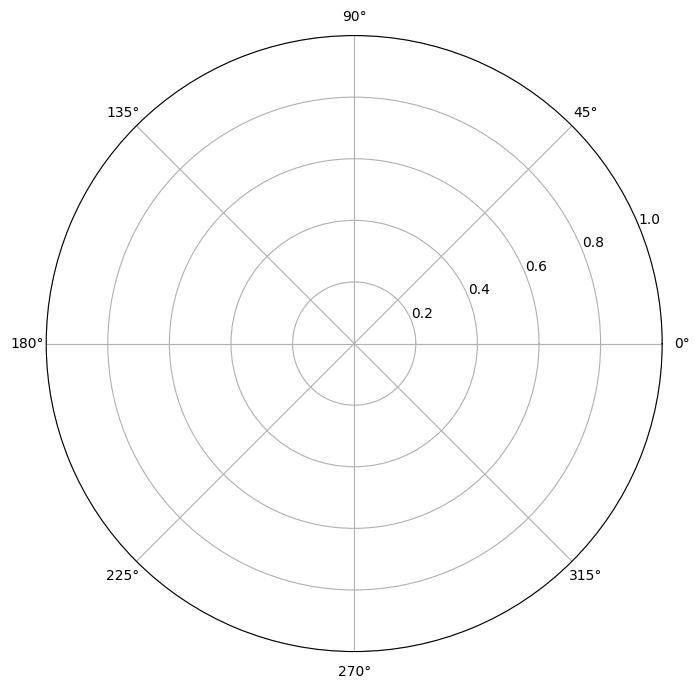

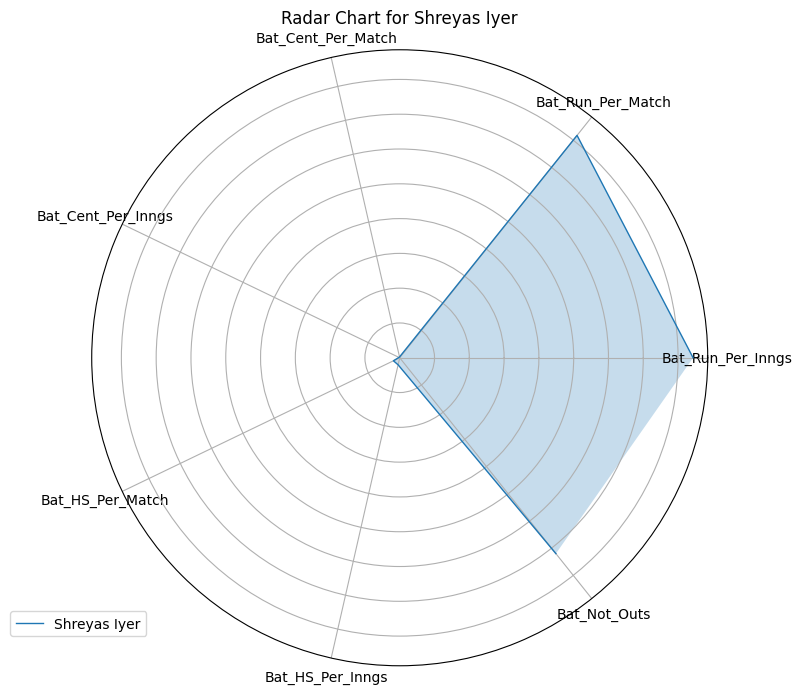



Name: Shubman Gill, Player ID: IND_40, Distance: 32.75851220705796



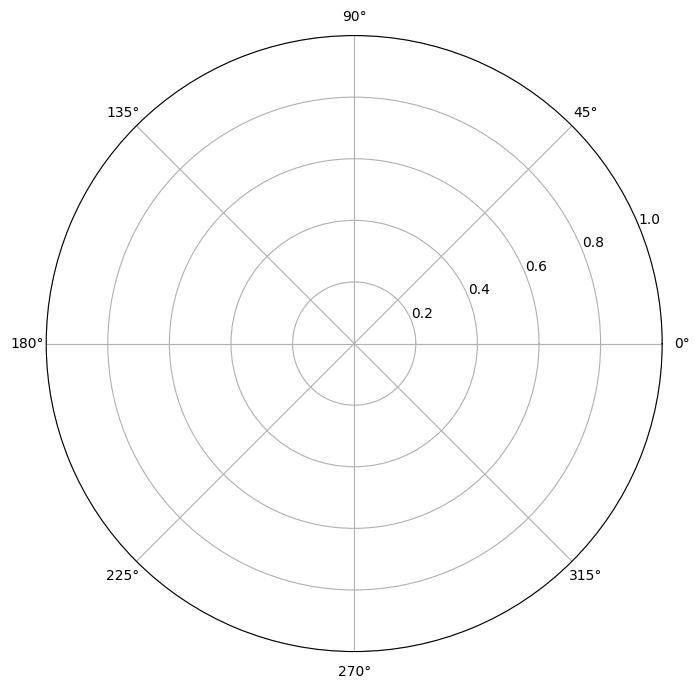

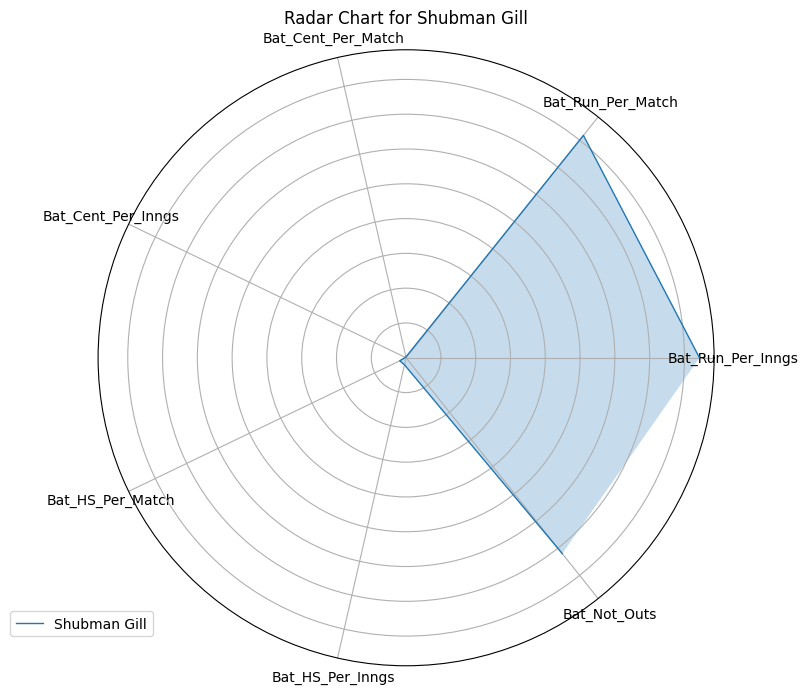

In [93]:
for country, team_bat_df in country_bat_dfs.items():
    country_code = player_id_injured.split('_')[0]
    if country_code == country:
        bat_knn_model = train_bat_knn_model(team_bat_df)
        print(f"Model Traned for Country Code: {country_code}\n\n")
        
        recommended_players, player_injured = recommend_bat_players(player_id_injured, team_bat_df, bat_knn_model)
        print(f"Top Like-for-Like Batting Replacements for {player_injured}:\n")
        
        # first recommendation is the same injured player
        count = 0
        for name, player_id, distance in recommended_players:
            count += 1
            if count == 1:
                print(f"Injured Player Data:\n")
                # continue   
            # 2nd Recommendation onwards
            else:
                print(f"\n\nName: {name}, Player ID: {player_id}, Distance: {distance}\n")
            
            # query player
            query_player_stats = player_bat_df[player_bat_df['Player_ID'] == player_id_injured]

            # Convert player stats to a list
            query_player_list = query_player_stats.drop(['Player_ID', 'Name'], axis=1).values.tolist()

            # Variables for radar chart
            labels = query_player_stats.drop(['Player_ID', 'Name'], axis=1).columns.tolist()
            num_vars = len(labels)
            angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

            # Plot radar chart for the current recommended player
            fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            # stats = query_player_list[0] + query_player_list[0][:1]  # Close the loop
            # ax.fill(angles, stats, alpha=0.25)
            # ax.plot(angles, stats, linewidth=1, label=name)
            # Ensure that stats array has one additional element to close the loop
            stats = query_player_list + [query_player_list[0]]

            # Plot radar chart for the current player
            fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            ax.fill(angles, stats[0], alpha=0.25)  # Use angles as x-values and stats as y-values
            ax.plot(angles, stats[0], linewidth=1, label=name)
            
            # Add labels and legend
            ax.set_yticklabels([])
            ax.set_xticks(angles)  # Use all angles as tick positions
            ax.set_xticklabels(labels)  # Use all labels
            ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
            
            # # Plot radar chart for the current player
            # fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            # ax.fill(angles, stats[0], alpha=0.25)  # Use angles as x-values and stats as y-values
            # ax.plot(angles, stats[0], linewidth=1, label=name)
        
            # # Add labels and legend
            # ax.set_yticklabels([])
            # ax.set_xticks(angles[:-1])
            # ax.set_xticklabels(labels)
            # ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
            # Show plot
            plt.title(f'Radar Chart for {name}')
            plt.show()
                    

In [94]:
# recommended_players, player_injured = recommend_bat_players(player_id_injured, player_bat_df, bat_knn_model)

# print(f"Top Like-for-Like Batting Replacements for {player_injured}:")
# for name, player_id, distance in recommended_players:
#     print(f"Name: {name}, Player ID: {player_id}, Distance: {distance}")

## Like-for-Like Bowling Replacement

In [95]:
def train_bowl_knn_model(player_bowl_df):
    X = player_bowl_df[bowl_features]
    y = player_bowl_df['Player_ID']  # 'Player_ID' is the target variable for similarity
    knn_model = KNeighborsRegressor(n_neighbors=6, weights='distance')
    knn_model.fit(X, y)
    return knn_model

In [96]:
def recommend_bowl_players(player_id_injured, player_bowl_df, knn_model):
    # Retrieving bowling statistics for the player to replace
    player_injured_data = player_bowl_df[player_bowl_df['Player_ID'] == player_id_injured]
    player_injured = player_injured_data['Name'].values[0]

    # Query kNN model to find nearest neighbors
    player_features_injured = player_injured_data[bowl_features]
    nearest_neighbor_distances, nearest_neighbor_indices = knn_model.kneighbors(player_features_injured, return_distance=True)
    
    # Generate recommendations based on nearest neighbors
    recommendations = []
    for dist, idx in zip(nearest_neighbor_distances.flatten(), nearest_neighbor_indices.flatten()):
        similar_player_id = player_bowl_df.iloc[idx]['Player_ID']
        similar_player_name = player_bowl_df.iloc[idx]['Name']
        recommendations.append((similar_player_name, similar_player_id, dist))

    return recommendations, player_injured

In [97]:
# Sample Bowling Recommendation
# player_id_injured = 'IND_16'  # Virat Kohli
# player_id_injured = 'AUS_40'  # Adam Zampa
player_id_injured = 'IND_38'  # Rohit Sharma

Model Traned for Country Code: IND


Top Like-for-Like Bowling Replacements for Rohit Sharma:

Injured Player Data:



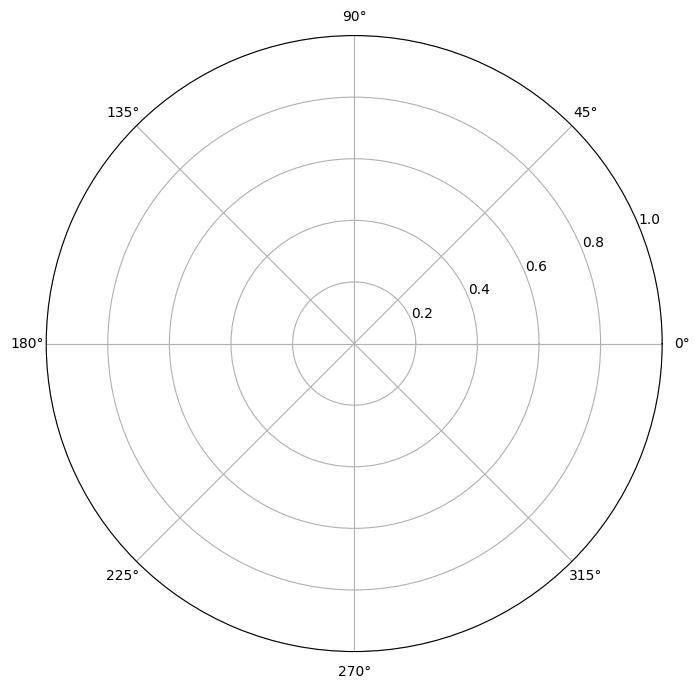

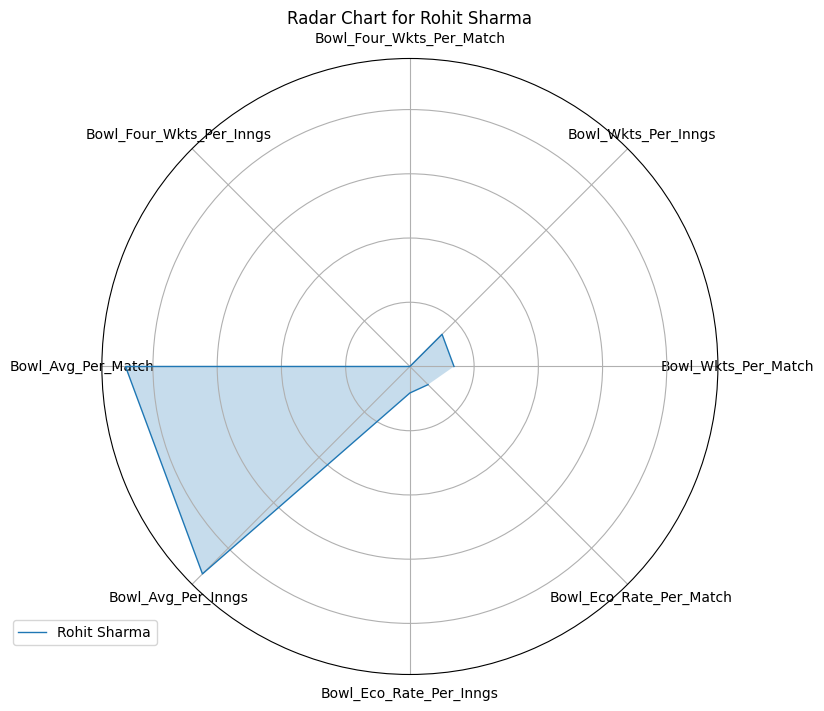



Name: Rishabh Pant, Player ID: IND_25, Distance: 0.3231248516693982



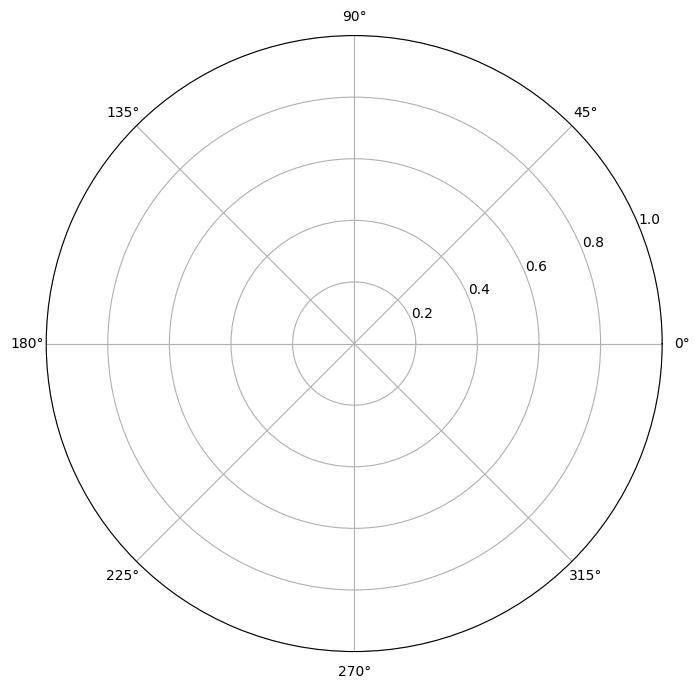

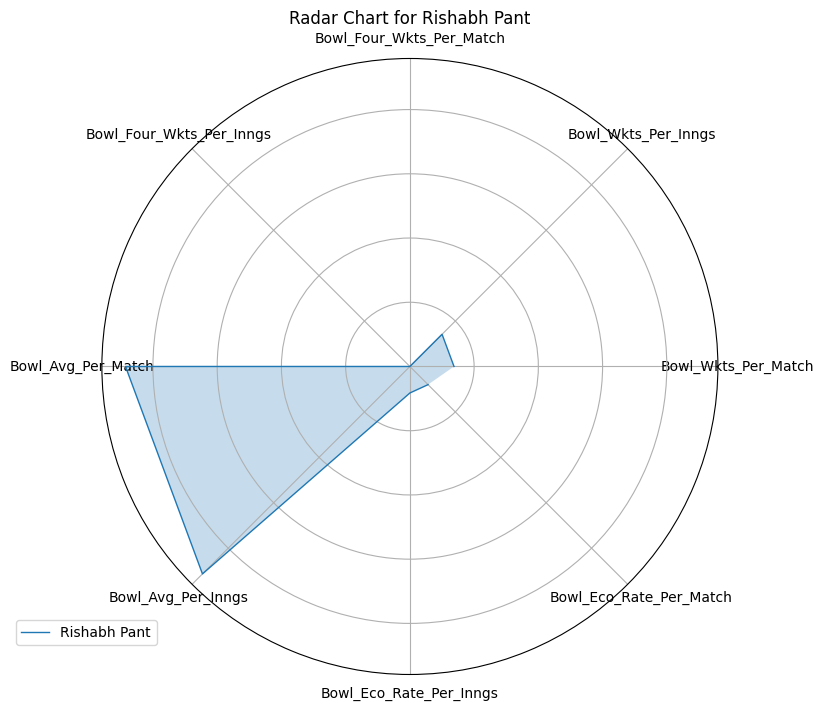



Name: Ruturaj Gaikwad, Player ID: IND_9, Distance: 0.3231248516693982



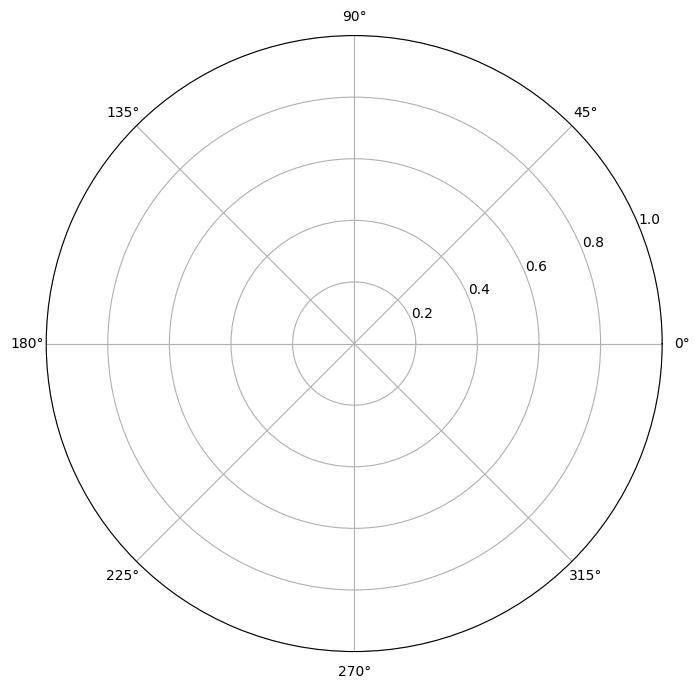

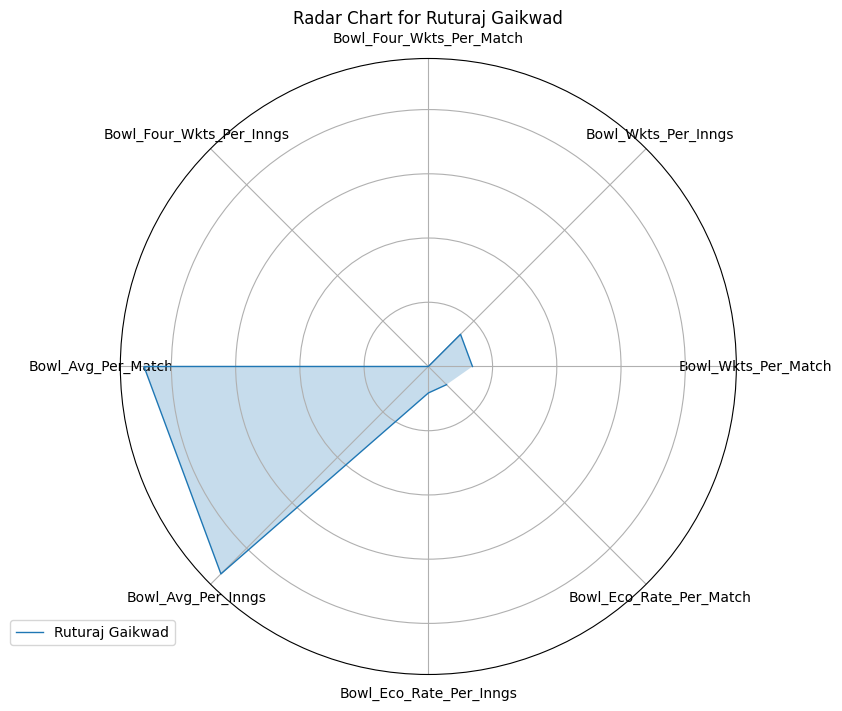



Name: Shikhar Dhawan, Player ID: IND_8, Distance: 0.3231248516693982



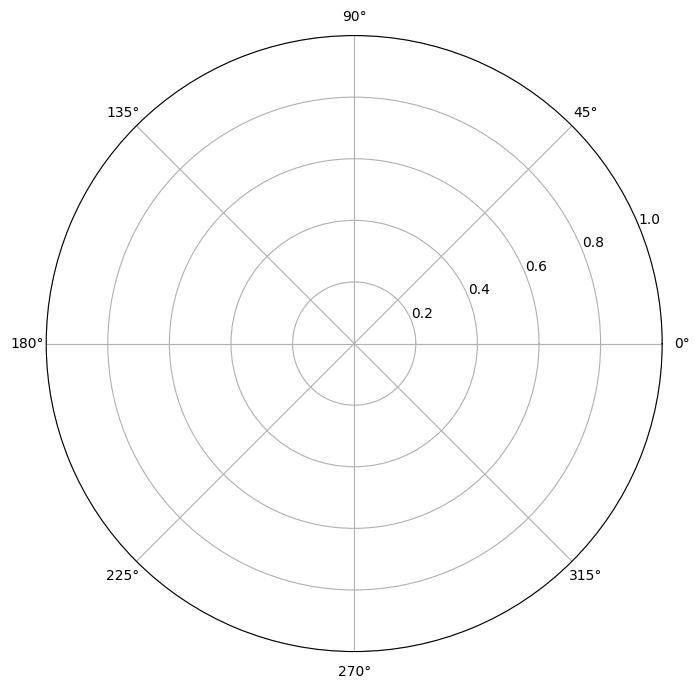

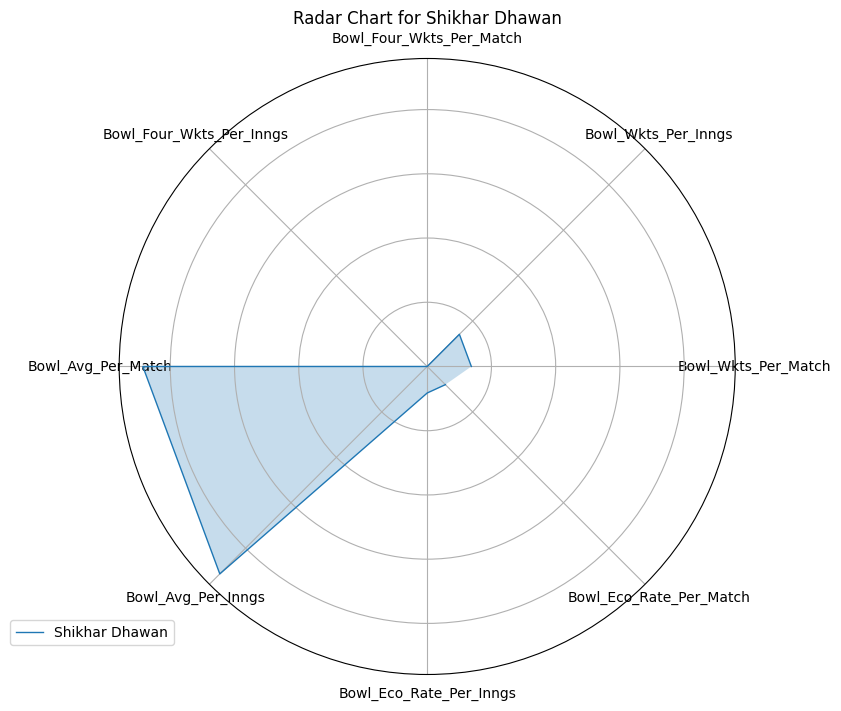



Name: Manish Pandey, Player ID: IND_22, Distance: 0.3231248516693982



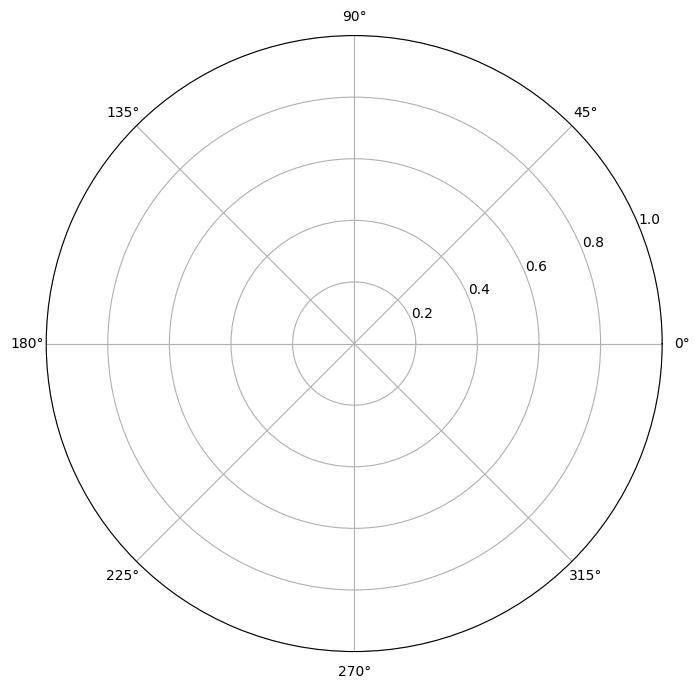

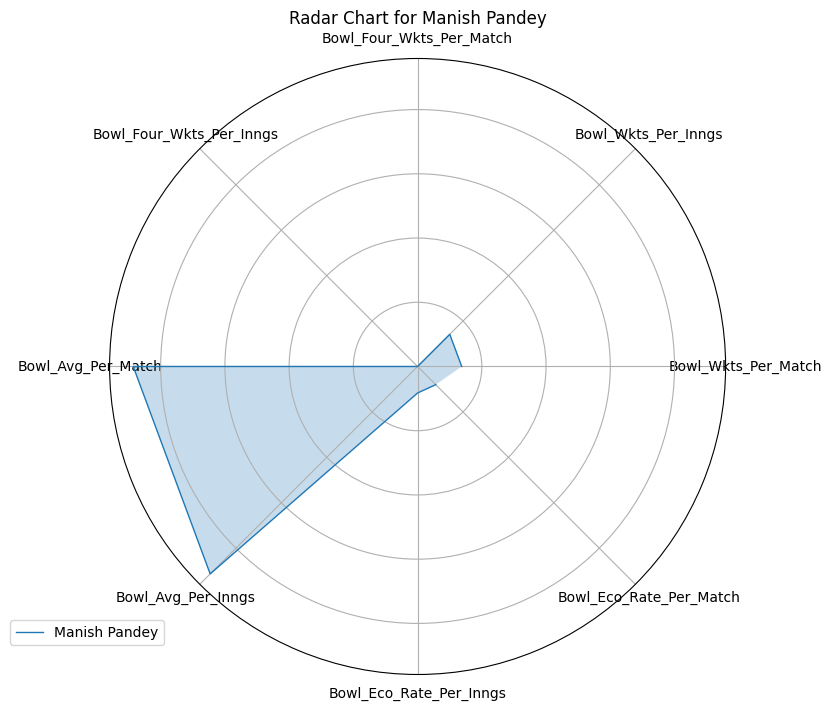



Name: Ishan Kishan, Player ID: IND_12, Distance: 0.3231248516693982



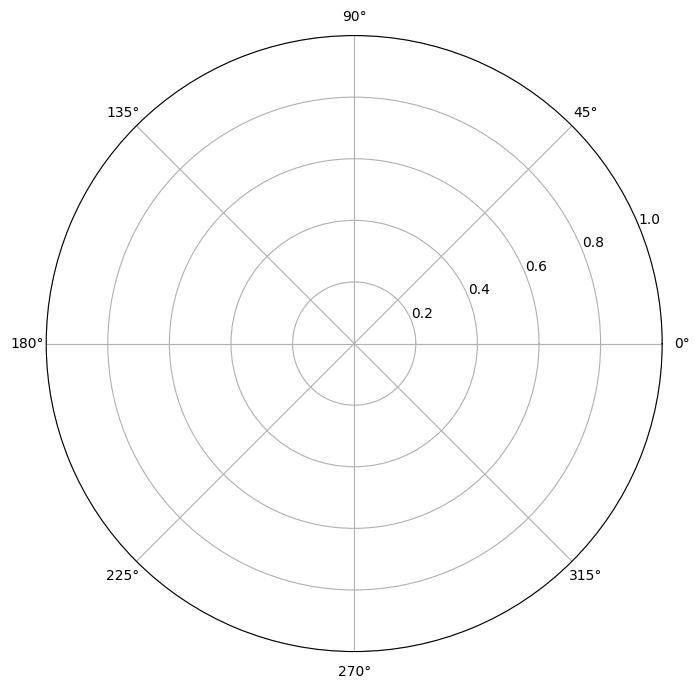

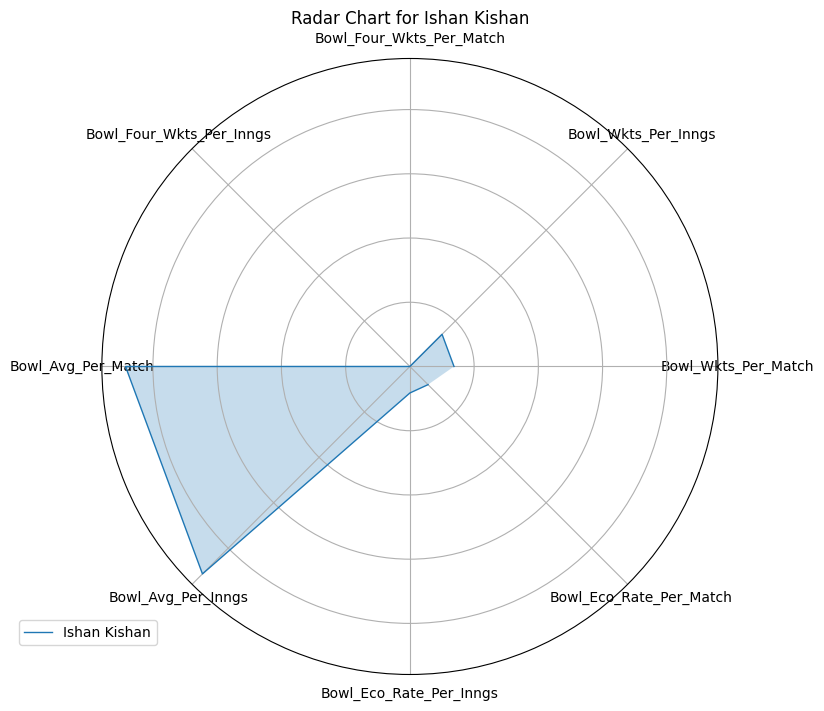

In [98]:
for country, team_bowl_df in country_bowl_dfs.items():
    country_code = player_id_injured.split('_')[0]
    if country_code == country:
        bowl_knn_model = train_bowl_knn_model(team_bowl_df)
        print(f"Model Traned for Country Code: {country_code}\n\n")
        
        recommended_players, player_injured = recommend_bowl_players(player_id_injured, team_bowl_df, bowl_knn_model)
        print(f"Top Like-for-Like Bowling Replacements for {player_injured}:\n")
        
        # first recommendation is the same injured player
        count = 0
        for name, player_id, distance in recommended_players:
            count += 1
            if count == 1:
                print(f"Injured Player Data:\n")
                # continue   
            # 2nd Recommendation onwards
            else:
                print(f"\n\nName: {name}, Player ID: {player_id}, Distance: {distance}\n")
            
            # query player
            query_player_stats = player_bowl_df[player_bowl_df['Player_ID'] == player_id_injured]

            # Convert player stats to a list
            query_player_list = query_player_stats.drop(['Player_ID', 'Name'], axis=1).values.tolist()

            # Variables for radar chart
            labels = query_player_stats.drop(['Player_ID', 'Name'], axis=1).columns.tolist()
            num_vars = len(labels)
            angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

            # Plot radar chart for the current recommended player
            fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            # stats = query_player_list[0] + query_player_list[0][:1]  # Close the loop
            # ax.fill(angles, stats, alpha=0.25)
            # ax.plot(angles, stats, linewidth=1, label=name)
            # Ensure that stats array has one additional element to close the loop
            stats = query_player_list + [query_player_list[0]]

            # Plot radar chart for the current player
            fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            ax.fill(angles, stats[0], alpha=0.25)  # Use angles as x-values and stats as y-values
            ax.plot(angles, stats[0], linewidth=1, label=name)
            
            # Add labels and legend
            ax.set_yticklabels([])
            ax.set_xticks(angles)  # Use all angles as tick positions
            ax.set_xticklabels(labels)  # Use all labels
            ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
            
            # # Plot radar chart for the current player
            # fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
            # ax.fill(angles, stats[0], alpha=0.25)  # Use angles as x-values and stats as y-values
            # ax.plot(angles, stats[0], linewidth=1, label=name)
        
            # # Add labels and legend
            # ax.set_yticklabels([])
            # ax.set_xticks(angles[:-1])
            # ax.set_xticklabels(labels)
            # ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        
            # Show plot
            plt.title(f'Radar Chart for {name}')
            plt.show()

# Experimentation

## Model Initialization and Fitting

In [99]:
# # Initialize the NearestNeighbors model
# k = 5  # Number of neighbors
# knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')

In [100]:
# # Iterating over each country code and its corresponding df
# for country_code, team_df in country_dfs.items():
#     # Standardize the features
#     scaler = StandardScaler()
#     team_df[features] = scaler.fit_transform(team_df[features])
    
#     # Fit the kNN model
#     knn_model.fit(team_df[features])

## Like-for-Like Replacement for Concussed Player

In [101]:
# # # Concussed Player
# # player_id_to_replace = 'AUS_40' # Adam Zampa

# # # Retrieve player data from team_data dictionary
# # for country_code, team_df in country_dfs.items():
# #     if 'Player_ID' in team_df.columns:
# #         player_data_to_replace = team_df[team_df['Player_ID'] == player_id_to_replace]
# #         if not player_data_to_replace.empty:
# #             break
# #     else:
# #         print("KeyError")

In [102]:
# # if player_data_to_replace is None or player_data_to_replace.empty:
# #     print(f"Player with ID '{player_id_to_replace}' not found.")
# #     # Handling the case where the player is not found
# # else:
# #     # Query the kNN model to find nearest neighbors
# #     distances, indices = knn_model.kneighbors(player_data_to_replace[features].values.reshape(1, -1))

# #     # Check if the indices are within bounds
# #     if len(indices) > 0 and indices[0].size > 0:
# #         # Get the nearest neighbor indices and corresponding distances
# #         nearest_neighbor_indices = indices.flatten()
# #         nearest_neighbor_distances = distances.flatten()
            
# #         # Generate recommendations based on nearest neighbors
# #         recommendations = []
# #         for idx, dist in zip(nearest_neighbor_indices, nearest_neighbor_distances):
# #             if idx < len(team_df):
# #                 similar_player_data = team_df.iloc[idx]  # Get data of similar player
# #                 recommendations.append((similar_player_data['Player_ID'], dist))  # Store player ID and distance
# #             else:
# #                 print(f"Index {idx} is out of bounds.")
# #     else:
# #         print("No nearest neighbors found.")

In [103]:
# player_id_to_replace = 'IND_16' # Virat Kohli

# # Retrieve player data from team_data dictionary
# for country_code, team_df in country_dfs.items():
#     # print(f"Country Code: {country_code}")
#     # print(f"Columns: {team_df.columns}")
#     if 'Player_ID' in team_df.columns:
#         player_data_to_replace = team_df[team_df['Player_ID'] == player_id_to_replace]
#         # print(f"Player Data: {player_data_to_replace}")
#         if not player_data_to_replace.empty:
#             break
#     else:
#         print("KeyError")

In [104]:
# # Query the kNN model to find nearest neighbors
# distances, indices = knn_model.kneighbors(player_data_to_replace[features].values.reshape(1, -1))
# print("Indices:", indices)
# print("Distances:", distances)

In [105]:
# # Check if the indices are within bounds
# if len(indices) > 0 and indices[0].size > 0:
#     # Get the nearest neighbor indices and corresponding distances
#     nearest_neighbor_indices = indices.flatten()
#     nearest_neighbor_distances = distances.flatten()
        
#     # Generate recommendations based on nearest neighbors
#     recommendations = []
#     for idx, dist in zip(nearest_neighbor_indices, nearest_neighbor_distances):
#         # print(f"Index: {idx}, DataFrame Length: {len(team_df)}")
#         if idx < len(team_df):
#             similar_player_data = team_df.iloc[idx]  # Get data of similar player
#             # print(similar_player_data)
#             recommendations.append((similar_player_data['Player_ID'], similar_player_data['Name'], dist))  # Store player ID and distance
#         else:
#             print(f"Index {idx} is out of bounds.")
# else:
#     print("No nearest neighbors found.")

# # Present recommendations
# print(f"Top Recommendations for Replacement of {player_data_to_replace.Name.values[0]}:")
# for player_id, name, distance, in recommendations:
#     print(f"Player ID: {player_id}, Name: {name}, Distance: {distance}")

In [106]:
# similar_player_data